<a href="https://colab.research.google.com/github/G0807/retail-sales-analysis/blob/main/Projeto1vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas e lendo o arquivo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

df_original = pd.read_excel('/content/Vendas2.xlsx')
display(df_original)


,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,1,2019-01-01,Iguatemi Esplanada,Sapato Estampa,1,358,358
1,1,2019-01-01,Iguatemi Esplanada,Camiseta,2,180,360
2,1,2019-01-01,Iguatemi Esplanada,Sapato Xadrez,1,368,368
3,2,2019-01-02,Norte Shopping,Relógio,3,200,600
4,2,2019-01-02,Norte Shopping,Chinelo Liso,1,71,71
...,...,...,...,...,...,...,...
100994,69996,2019-12-26,Center Shopping Uberlândia,Short Listrado,2,102,204
100995,69996,2019-12-26,Center Shopping Uberlândia,Mochila,4,270,1080
100996,69996,2019-12-26,Center Shopping Uberlândia,Pulseira Estampa,1,87,87
100997,69997,2019-12-26,Ribeirão Shopping,Camisa Listrado,1,108,108


Criando um Dataframe amostra (somente para simulação a quantidade de dados original não é grande o bastante para este procedimento, o dataframe original pode ser analisado tranquilamente, o processo de amostragem aqui só tem efeito didático.)

In [3]:
df_amostra = df_original.sample(n=1000)
display(df_amostra)

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
40682,28035,2019-05-26,Passei das Águas Shopping,Sunga Linho,1,149,149
71627,49644,2019-09-12,Novo Shopping Ribeirão Preto,Bermuda Linho,1,195,195
46555,32076,2019-06-16,Palladium Shopping Curitiba,Calça Listrado,1,181,181
3382,2283,2019-01-13,Norte Shopping,Mochila Listrado,1,275,275
36945,25523,2019-05-12,Rio Mar Shopping Fortaleza,Cinto Linho,2,248,496
...,...,...,...,...,...,...,...
16767,11542,2019-03-02,Shopping SP Market,Camisa Gola V Xadrez,2,107,214
60121,41549,2019-08-03,Rio Mar Shopping Fortaleza,Cinto Liso,1,209,209
3207,2163,2019-01-13,Center Shopping Uberlândia,Cueca,1,50,50
11976,8281,2019-02-13,Shopping Iguatemi Fortaleza,Cinto Linho,1,248,248


Verificando o tipo de dados e alterando aqueles cujo o valor não é ideal para a análise

In [4]:
df_amostra['Data'] = pd.to_datetime(df_amostra['Data'])
print(df_amostra.dtypes)

Código Venda               int64
Data              datetime64[ns]
ID Loja                   object
Produto                   object
Quantidade                 int64
Valor Unitário             int64
Valor Final                int64
dtype: object


Veficando se há  NaN.

In [5]:
df_amostra.isnull().sum()

,0
Código Venda,0
Data,0
ID Loja,0
Produto,0
Quantidade,0
Valor Unitário,0
Valor Final,0


Verificando se há linhas repetidas.

In [6]:
duplicadas = df_amostra.duplicated()
print(duplicadas.sum())

0


 Análise Exploratória de Dados (EDA)
 Abtendo valor total de vendas.

In [7]:
valor_total = df_amostra['Valor Final'].sum()
print(valor_total)

383723


Total de itens vendidos

In [8]:
total_itens = df_amostra['Quantidade'].sum()
print(total_itens)

2162


Desempenho por Loja:
 Top 5 lojas com maior valor de vendas.

In [9]:
top_lojas = df_amostra[['ID Loja','Valor Final']].groupby('ID Loja').sum().sort_values(by='Valor Final',ascending=False).head(5)
display(top_lojas)

,Valor Final
ID Loja,
Bourbon Shopping SP,23509
Shopping Vila Velha,23303
Shopping Ibirapuera,19687
Palladium Shopping Curitiba,19149
Ribeirão Shopping,18846


 A média de vendas por loja.

In [10]:
media_lojas = df_amostra[['ID Loja','Quantidade']].groupby('ID Loja').mean().sort_values(by='Quantidade',ascending=False)
display(media_lojas)

,Quantidade
ID Loja,
Palladium Shopping Curitiba,2.431818
Shopping União de Osasco,2.411765
Shopping Center Leste Aricanduva,2.379310
Shopping Morumbi,2.344828
Parque Dom Pedro Shopping,2.342857
Rio Mar Recife,2.340909
Iguatemi Campinas,2.314286
Shopping Barra,2.310345
Rio Mar Shopping Fortaleza,2.307692


Top 5. Lojas com maior número de vendas.

In [11]:
top_lojas_quantidade = df_amostra[['ID Loja','Quantidade']].groupby('ID Loja').sum().sort_values(by='Quantidade',ascending=False).head(5)
display(top_lojas_quantidade)

,Quantidade
ID Loja,
Bourbon Shopping SP,132
Shopping Ibirapuera,122
Palladium Shopping Curitiba,107
Shopping Vila Velha,107
Center Shopping Uberlândia,104


Lojas com menor número de vendas em quantidade.

In [12]:
min_lojas_quantidade = df_amostra[['ID Loja','Quantidade']].groupby('ID Loja').sum().sort_values(by='Quantidade',ascending=True)
display(min_lojas_quantidade.head(7))


,Quantidade
ID Loja,
Shopping Midway Mall,65
Shopping Barra,67
Shopping Morumbi,68
Passei das Águas Shopping,68
Shopping Center Leste Aricanduva,69
Novo Shopping Ribeirão Preto,73
Shopping Recife,74


Lojas com menor valor de vendas lucro bruto.

In [13]:
min_lojas_valor_final = df_amostra[['ID Loja','Valor Final']].groupby('ID Loja').sum().sort_values(by='Valor Final',ascending=True)
display(min_lojas_valor_final.head(7))

,Valor Final
ID Loja,
Shopping Midway Mall,9890
Passei das Águas Shopping,10995
Shopping Recife,11201
Shopping Center Leste Aricanduva,11417
Shopping Iguatemi Fortaleza,11512
Salvador Shopping,11744
Shopping Barra,12616


 top 5 produtos mais vendidos

In [14]:
df_amostra[['Produto','Quantidade']].groupby('Produto').sum().sort_values(by='Quantidade',ascending=False).head(5)

,Quantidade
Produto,
Casaco Linho,37
Gorro Liso,36
Cinto,35
Camiseta Liso,32
Short Xadrez,32


" o código abaixo é sujestão do Colab.

In [15]:
top_produtos = df_amostra.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False).head(5)
display(top_produtos)

,Quantidade
Produto,
Casaco Linho,37
Gorro Liso,36
Cinto,35
Camiseta Liso,32
Short Xadrez,32


Lucro bruto por produdo

In [16]:
lucro_bruto = df_amostra.groupby('Produto')['Valor Final'].sum().sort_values(ascending=False)
display(lucro_bruto)

,Valor Final
Produto,
Terno Xadrez,11344
Casaco Linho,11063
Terno Estampa,9884
Sapato,9800
Terno Listrado,8508
...,...
Pulseira,630
Chinelo Xadrez,528
Polo Listrado,447


Análise Temporal

Vendas por mês

In [17]:
vendas_por_mes = df_amostra.groupby(df_amostra['Data'].dt.month)['Valor Final'].sum()
display(vendas_por_mes)

,Valor Final
Data,
1,30172
2,36397
3,36492
4,28302
5,33062
6,29630
7,29388
8,35497
9,33928


Vendas Trimestrais

In [18]:
vendas_trimestrais = df_amostra.groupby(df_amostra['Data'].dt.to_period('Q'))['Valor Final'].sum()
display(vendas_trimestrais)

,Valor Final
Data,
2019Q1,103061
2019Q2,90994
2019Q3,98813
2019Q4,90855


 Meses com maior e menor volume de vendas

In [19]:
mes_maior_volume = vendas_por_mes.idxmax()
mes_menor_volume = vendas_por_mes.idxmin()
print(f"O mês com maior volume de vendas foi {mes_maior_volume} com um total de R${vendas_por_mes.max():.2f}")
print(f"O mês com menor volume de vendas foi {mes_menor_volume} com um total de R${vendas_por_mes.min():.2f}")

O mês com maior volume de vendas foi 3 com um total de R$36492.00
O mês com menor volume de vendas foi 12 com um total de R$27869.00


Visualização de Dados:

 Vendas totais por loja (top 5).

<ipython-input-20-b5820561e918>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ID Loja', y='Valor Final', data=top_lojas.reset_index(),palette='pastel')


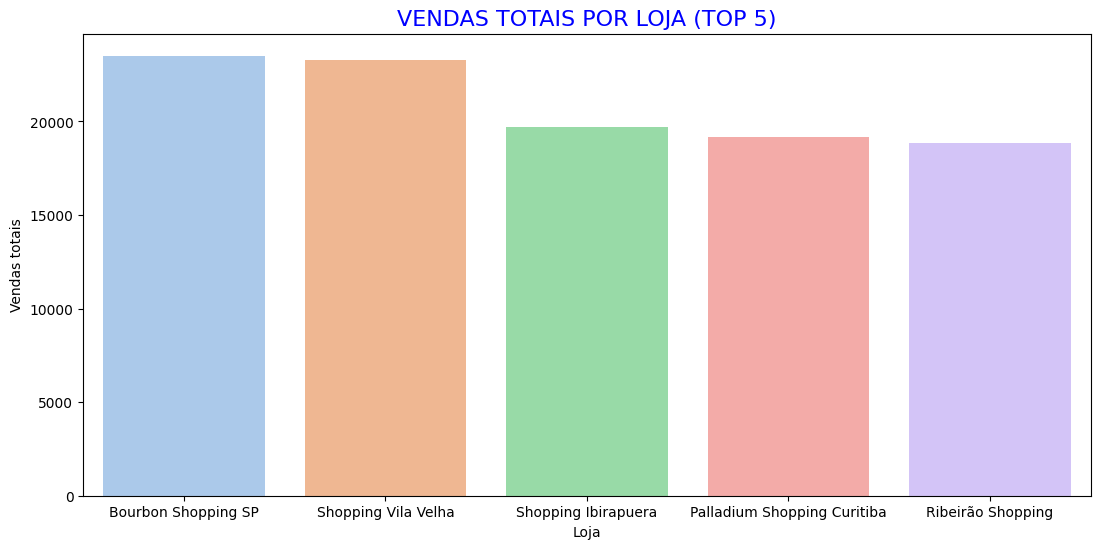

In [20]:
top_lojas = df_amostra[['ID Loja','Valor Final']].groupby('ID Loja').sum().sort_values(by='Valor Final',ascending=False).head(5)

plt.figure(figsize=(13, 6))
sns.barplot(x='ID Loja', y='Valor Final', data=top_lojas.reset_index(),palette='pastel')
plt.title('VENDAS TOTAIS POR LOJA (TOP 5)', fontsize=16, color='blue', loc='center')
plt.xlabel('Loja')
plt.ylabel('Vendas totais')
plt.show()

Vendas totais por produto (top 5)

<ipython-input-21-aba74e737705>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Produto',y='Quantidade',data=top_5produtos.reset_index(),palette='viridis')


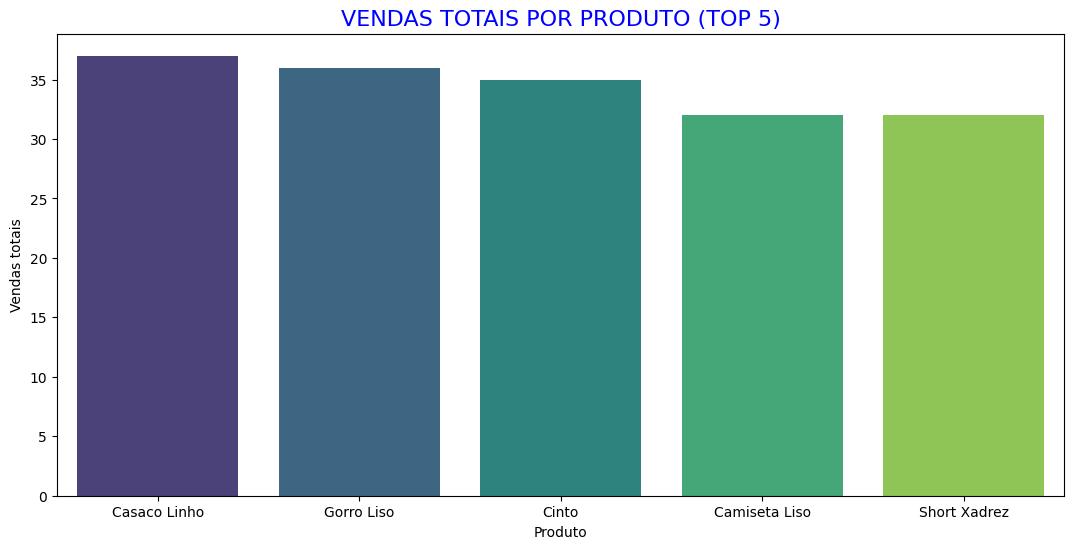

In [21]:
top_5produtos = df_amostra[['Produto','Quantidade']].groupby('Produto').sum().sort_values(by='Quantidade',ascending=False).head(5)
plt.figure(figsize=(13,6))
sns.barplot(x='Produto',y='Quantidade',data=top_5produtos.reset_index(),palette='viridis')
plt.title('VENDAS TOTAIS POR PRODUTO (TOP 5)', fontsize=16, color='blue', loc='center')
plt.xlabel('Produto')
plt.ylabel('Vendas totais')
plt.show()


Vendas mensais ao longo do ano.

Text(0, 0.5, 'Vendas totais')

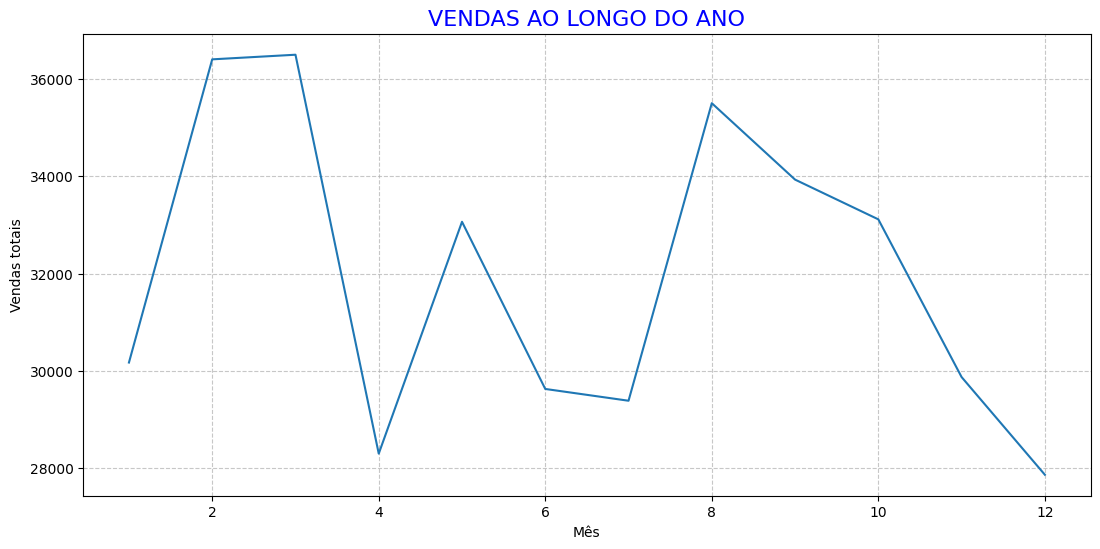

In [88]:
vendas_por_mes = df_amostra.groupby(df_amostra['Data'].dt.month)['Valor Final'].sum()
plt.figure(figsize=(13,6))
sns.lineplot(x=vendas_por_mes.index,y=vendas_por_mes.values)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('VENDAS AO LONGO DO ANO', fontsize=16, color='blue', loc='center')
plt.xlabel('Mês')
plt.ylabel('Vendas totais')

Vendas da loja Burbom Shoppin a Top 1 'Valor Final'

Text(0, 0.5, 'Vendas totais')

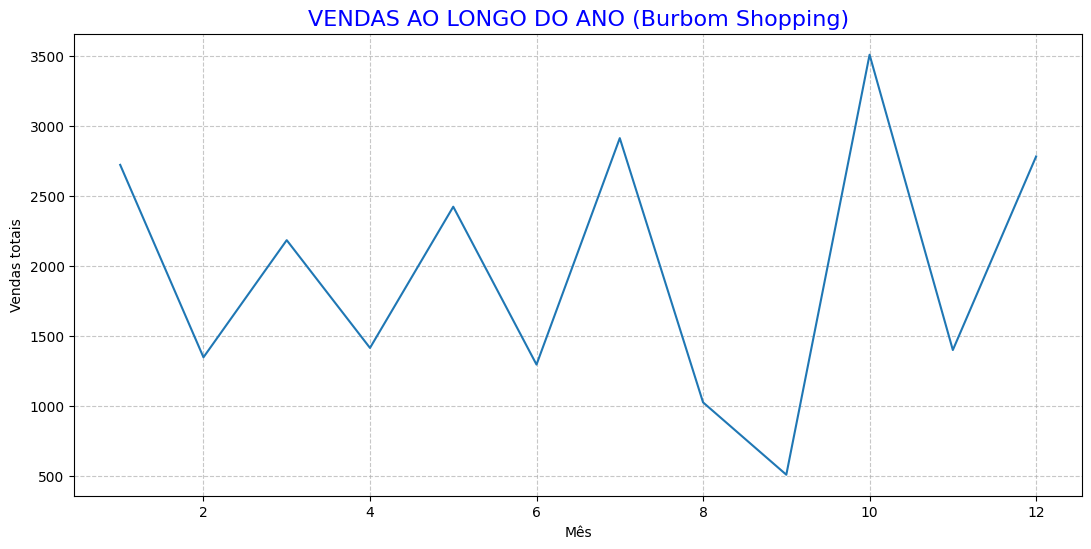

In [86]:
burbom_shopping = df_amostra[df_amostra['ID Loja'] == 'Bourbon Shopping SP']
vendas_por_mes = burbom_shopping.groupby(df_amostra['Data'].dt.month)['Valor Final'].sum()
plt.figure(figsize=(13,6))
sns.lineplot(x=vendas_por_mes.index,y=vendas_por_mes.values)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('VENDAS AO LONGO DO ANO (Burbom Shopping)', fontsize=16, color='blue', loc='center')
plt.xlabel('Mês')
plt.ylabel('Vendas totais')

Comparação

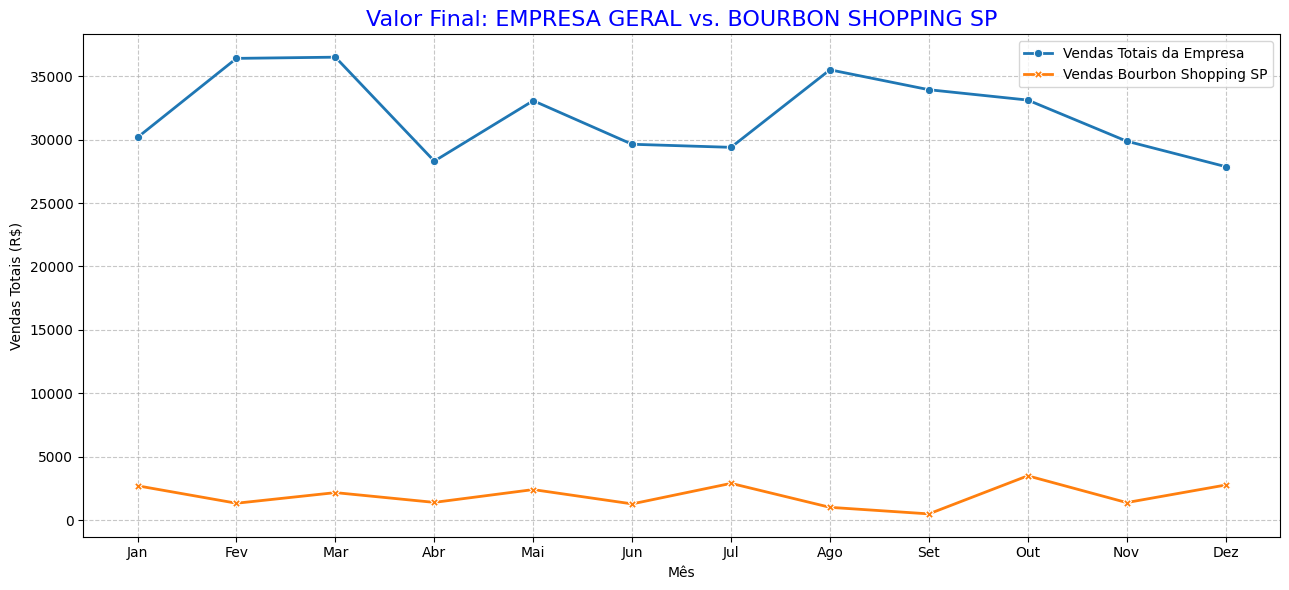

In [89]:
vendas_por_mes_geral = df_amostra.groupby(df_amostra['Data'].dt.month)['Valor Final'].sum()
burbom_shopping = df_amostra[df_amostra['ID Loja'] == 'Bourbon Shopping SP']
vendas_por_mes_bourbon = burbom_shopping.groupby(df_amostra['Data'].dt.month)['Valor Final'].sum()
plt.figure(figsize=(13,6))
sns.lineplot(x=vendas_por_mes_geral.index, y=vendas_por_mes_geral.values, label='Vendas Totais da Empresa', marker='o', linewidth=2)
sns.lineplot(x=vendas_por_mes_bourbon.index, y=vendas_por_mes_bourbon.values, label='Vendas Bourbon Shopping SP', marker='X', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Valor Final: EMPRESA GERAL vs. BOURBON SHOPPING SP', fontsize=16, color='blue', loc='center')
plt.xlabel('Mês')
plt.ylabel('Vendas Totais (R$)')
plt.xticks(range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']) # Melhora os rótulos do eixo X
plt.legend(fontsize=10) # Adiciona a legenda para identificar as linhas
plt.tight_layout()
plt.show()

O grafico nos da 2 situações a loja Burbom é mais estavel, e demonstrou não sofrer queda em Dezembro como o grafico geral

 A relação entre Quantidade e Valor Final

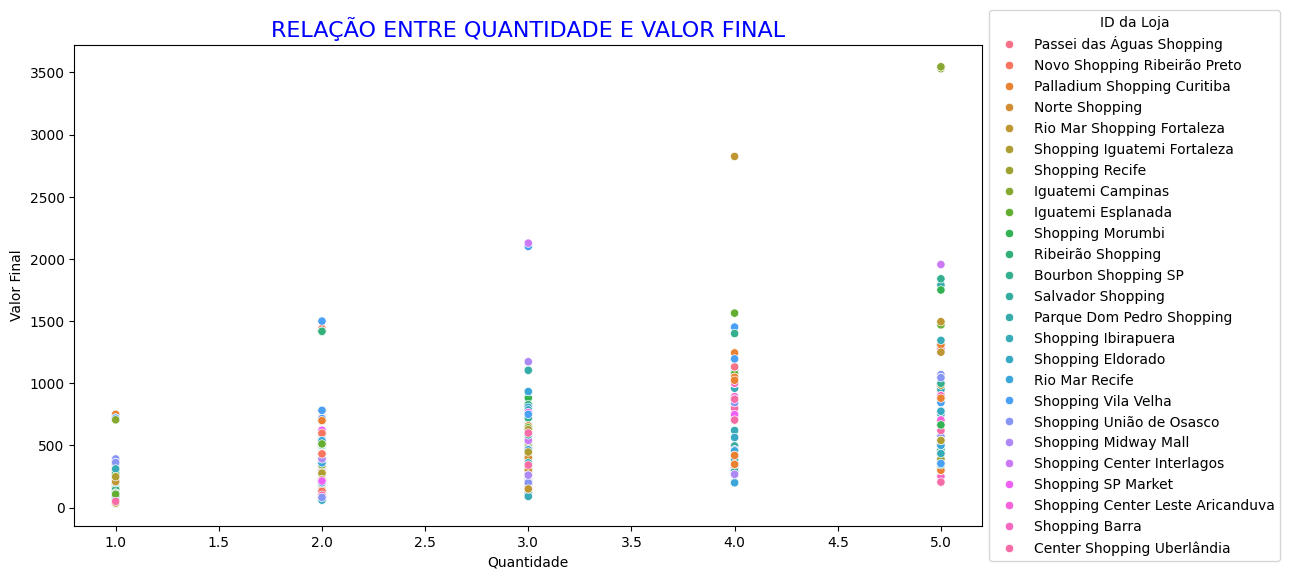

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(13,6))
sns.scatterplot(x='Quantidade',y='Valor Final',data=df_amostra,hue='ID Loja')

plt.title('RELAÇÃO ENTRE QUANTIDADE E VALOR FINAL', fontsize=16, color='blue', loc='center')
plt.xlabel('Quantidade')
plt.ylabel('Valor Final')

# --- Adicionando e Posicionando a Legenda ---
plt.legend(title='ID da Loja', loc='center left', bbox_to_anchor=(1, 0.5))
# title: Título da legenda (opcional, mas bom para clareza)
# loc: Posição "interna" da legenda antes de ancorar. 'center left' é um bom ponto de partida.
# bbox_to_anchor:
#    (1, 0.5) significa:
#    1: Ancorar a legenda à direita da área de plotagem (1.0 é o extremo direito).
#    0.5: Ancorar no meio da altura vertical da área de plotagem (0.5 é o meio).

plt.tight_layout() # Garante que a legenda não seja cortada fora da figura

plt.show()

Informações Extras: Nome das lojas


In [24]:
display(df_amostra['ID Loja'].unique())

array(['Passei das Águas Shopping', 'Novo Shopping Ribeirão Preto',
       'Palladium Shopping Curitiba', 'Norte Shopping',
       'Rio Mar Shopping Fortaleza', 'Shopping Iguatemi Fortaleza',
       'Shopping Recife', 'Iguatemi Campinas', 'Iguatemi Esplanada',
       'Shopping Morumbi', 'Ribeirão Shopping', 'Bourbon Shopping SP',
       'Salvador Shopping', 'Parque Dom Pedro Shopping',
       'Shopping Ibirapuera', 'Shopping Eldorado', 'Rio Mar Recife',
       'Shopping Vila Velha', 'Shopping União de Osasco',
       'Shopping Midway Mall', 'Shopping Center Interlagos',
       'Shopping SP Market', 'Shopping Center Leste Aricanduva',
       'Shopping Barra', 'Center Shopping Uberlândia'], dtype=object)

 numero de ocorrencia das lojas

In [25]:
ocorrencias = df_amostra['ID Loja'].value_counts()
print(ocorrencias)

ID Loja
Bourbon Shopping SP                 59
Shopping Ibirapuera                 54
Shopping Vila Velha                 48
Center Shopping Uberlândia          47
Shopping Center Interlagos          45
Shopping SP Market                  44
Rio Mar Recife                      44
Palladium Shopping Curitiba         44
Salvador Shopping                   42
Shopping Eldorado                   42
Ribeirão Shopping                   41
Norte Shopping                      40
Shopping Iguatemi Fortaleza         40
Rio Mar Shopping Fortaleza          39
Iguatemi Esplanada                  39
Shopping Recife                     38
Novo Shopping Ribeirão Preto        35
Shopping Midway Mall                35
Iguatemi Campinas                   35
Parque Dom Pedro Shopping           35
Shopping União de Osasco            34
Passei das Águas Shopping           33
Shopping Morumbi                    29
Shopping Center Leste Aricanduva    29
Shopping Barra                      29
Name: count, dtyp

Resultado da analise:

Quais foram as lojas com melhor desempenho?

Shopping Center Leste Aricanduva	34206,
Rio Mar Recife	20577,
Shopping Center Interlagos	20337,
Palladium Shopping Curitiba	19280,
Bourbon Shopping SP	18935.

Quais produtos foram os "campeões de vendas"?
Calça Liso	45,
Calça	42,
Camisa Xadrez	41,
Pulseira Estampa	35,
Terno Linho	33,

Houve alguma sazonalidade nas vendas (picos em certos meses, quedas em outros)?

O mês com maior volume de vendas foi outubro com total R$48540.00

 e o mês com o menor volume de vendas foi dezembro com o total de R$ 24094.00.

Quais poderiam ser os próximos passos para otimizar as vendas (por exemplo, focar em marketing para produtos de baixo desempenho ou investir mais nas lojas de melhor desempenho)?

focar no marketing para produtos de baixo desempenho não é vialvel, pela analise chegamos a conclusão que mesmo com um alto fluxo de vendas estes produtos não consiguiram igualar os lucros de produtos mais caros com baixo fluxo de venda. Então o foco é investir nas lojas. Observação: seria bom fazer uma analize personalizada para as lojas de alto desempenho e descubrir os motivos do seu alto desempenho para aplicar nas demais se possivel.


PARTE 2

Aprofundamento.

1. Receita média por item vendido

In [26]:
media_produtos = df_amostra[['Produto','Valor Final']].groupby('Produto').mean().sort_values(by='Valor Final',ascending=False)
display(media_produtos)

,Valor Final
Produto,
Terno,2100.000000
Terno Xadrez,1890.666667
Terno Estampa,1647.333333
Terno Listrado,1418.000000
Terno Linho,1000.000000
...,...
Chinelo Xadrez,105.600000
Meia Xadrez,87.125000
Meia Liso,71.777778


2. Análise Detalhada das Lojas de Alto Desempenho:

Padrões de Produtos: Quais produtos são mais vendidos (em quantidade e valor) nas lojas de alto desempenho? Há alguma diferença significativa nos "campeões de vendas" entre as lojas de topo e as de baixo desempenho?

Analisando hipótese de influencia dos Produdos no desempenho das lojas top 5

'Shopping Iguatemi Fortaleza' Top 1

,Quantidade
Produto,
Short Liso,6
Pulseira Listrado,6
Camiseta Listrado,5
Short Estampa,5
Polo Linho,4
Camisa Estampa,3
Short,3


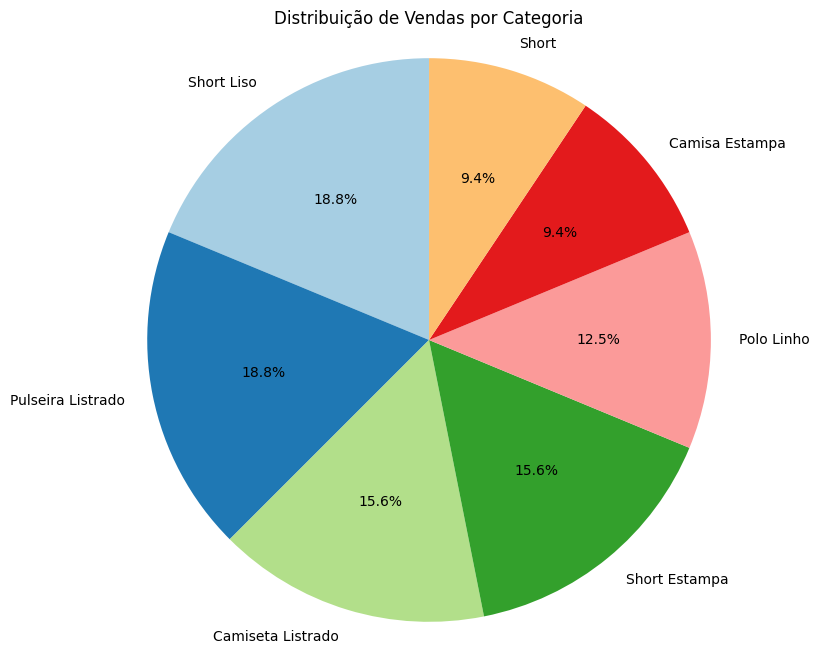

In [27]:
# Primeiro, filtre o DataFrame para incluir apenas as vendas do "Shopping Iguatemi Fortaleza"
df_iguatemi = df_amostra[df_amostra['ID Loja'] == 'Shopping Iguatemi Fortaleza']

# Em seguida, agrupe por 'Produto' e some a 'Quantidade' para este subconjunto
Shopping_Iguatemi_Fortaleza = df_iguatemi.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

# Por fim, exiba o resultado
display(Shopping_Iguatemi_Fortaleza.head(7))
top_7_produtos_fortaleza = Shopping_Iguatemi_Fortaleza.head(7)
lista_produtos = top_7_produtos_fortaleza.index.tolist()
lista_quantidades = top_7_produtos_fortaleza.values.tolist()
# --- Criando o Gráfico de Pizza ---
plt.figure(figsize=(8, 8)) # Define o tamanho da figura (largura, altura)

plt.pie(lista_quantidades, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
# 'autopct='%1.1f%%'' formata os percentuais dentro das fatias (1 casa decimal)
# 'startangle=90' inicia a primeira fatia no topo (ângulo de 90 graus)
# 'colors=plt.cm.Paired.colors' usa uma paleta de cores predefinida para deixar mais bonito

plt.title('Distribuição de Vendas por Categoria') # Adiciona um título ao gráfico
plt.axis('equal') # Garante que o gráfico de pizza seja um círculo perfeito
plt.show() # Exibe o gráfico


,Valor Final
Produto,
Camiseta Listrado,985
Casaco Xadrez,777
Polo Linho,704
Sapato,700
Short Liso,648
Cinto Estampa,627
Tênis Listrado,524


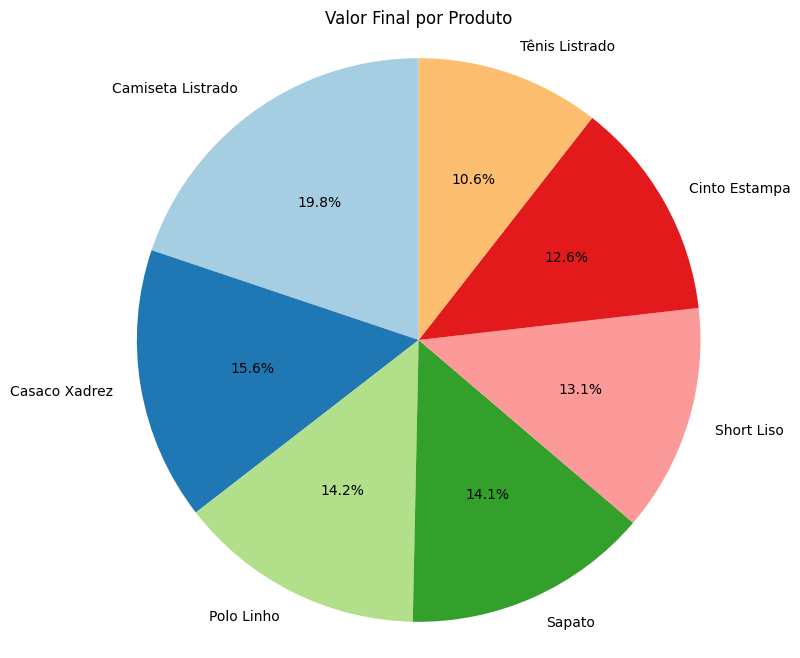

In [28]:
# valor final total por produto para o "Shopping Iguatemi Fortaleza"!
top_1 = df_amostra[df_amostra['ID Loja'] == 'Shopping Iguatemi Fortaleza']
valor_final_por_produto = top_1.groupby('Produto')['Valor Final'].sum().sort_values(ascending=False)
display(valor_final_por_produto.head(7))
valor_final_por_produto = valor_final_por_produto.head(7)
lista_produtos = valor_final_por_produto.index.tolist()
lista_valor_final = valor_final_por_produto.values.tolist()
plt.figure(figsize=(8,8))
plt.pie(lista_valor_final, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Valor Final por Produto')
plt.axis('equal')
plt.show()

Comparando os dois graficos e pegando como base os produtos Bermuda listrada 19,5 % das vendas e terno linho 12,2% das vendas mesmo tendo uma quantia menor ainda assim é quase 3 vezes mais lucrativo.

E itens como camiseta xadres mesmo estando entre os tops produtos em quantidade de vendas, nem sequer aparece entre os que mais geram lucro para a loja.

Shopping União de Osasco	Top 2

,Quantidade
Produto,
Bermuda Linho,6
Camisa Gola V,5
Cinto Estampa,5
Cinto Listrado,5
Sunga Listrado,5
Sunga Xadrez,4
Calça Linho,4


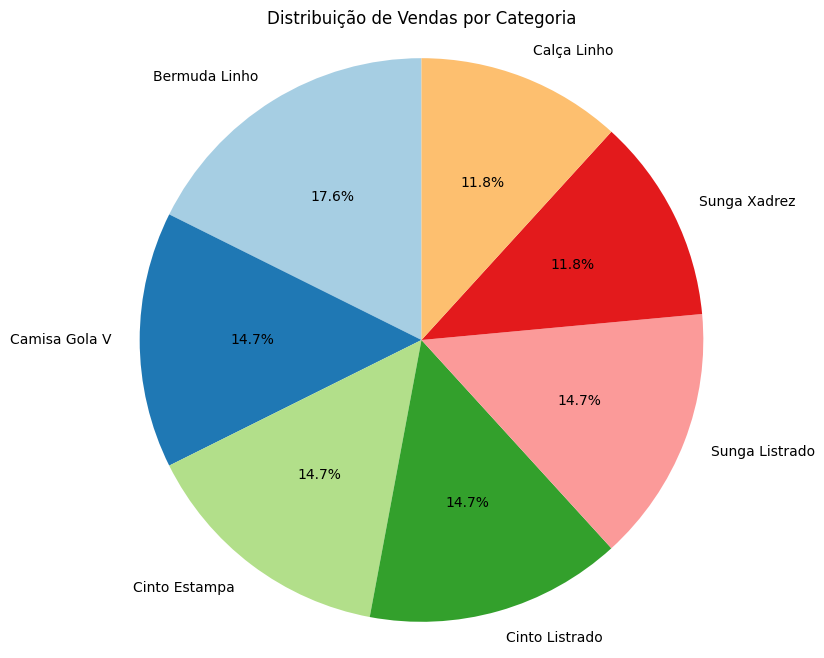

In [29]:
df_osasco = df_amostra[df_amostra['ID Loja'] == 'Shopping União de Osasco']
Shopping_União_de_Osasco = df_osasco.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
display(Shopping_União_de_Osasco.head(7))
top_7_produtos_osasco = Shopping_União_de_Osasco.head(7)
# Transformando em listas
lista_produtos = top_7_produtos_osasco.index.tolist()
lista_quantidades = top_7_produtos_osasco.values.tolist()
plt.figure(figsize=(8, 8))
plt.pie(lista_quantidades, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Vendas por Categoria')
plt.axis('equal')
plt.show()

,Valor Final
Produto,
Bermuda Linho,1170
Cinto Listrado,1070
Cinto Estampa,1045
Calça Linho,844
Casaco Liso,765
Terno Listrado,709
Cinto Liso,627


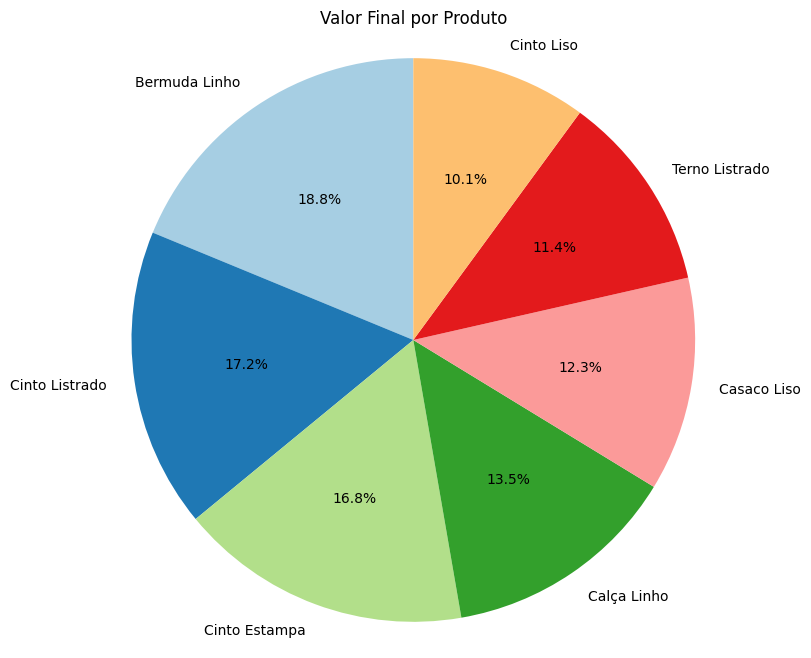

In [30]:
top_2 = df_amostra[df_amostra['ID Loja'] == 'Shopping União de Osasco']
valor_final_por_produto = top_2.groupby('Produto')['Valor Final'].sum().sort_values(ascending=False)
display(valor_final_por_produto.head(7))
valor_final_por_produto = valor_final_por_produto.head(7)
lista_produtos = valor_final_por_produto.index.tolist()
lista_valor_final = valor_final_por_produto.values.tolist()
plt.figure(figsize=(8,8))
plt.pie(lista_valor_final, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Valor Final por Produto')
plt.axis('equal')
plt.show()

Center Shopping Uberlândia	Top 3

,Quantidade
Produto,
Gorro Liso,8
Polo Linho,7
Relógio Listrado,7
Short Xadrez,6
Cinto,6
Cueca Listrado,5
Meia Xadrez,5


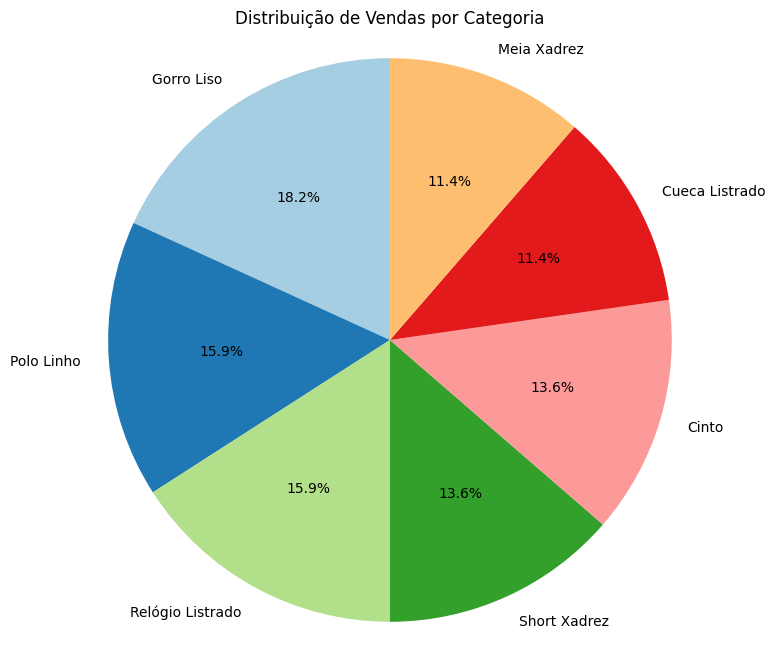

In [31]:
df_uberlandia = df_amostra[df_amostra['ID Loja'] == 'Center Shopping Uberlândia']
Center_Shopping_Uberlândia = df_uberlandia.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
display(Center_Shopping_Uberlândia.head(7))
top_7_produtos_uberlandia = Center_Shopping_Uberlândia.head(7)
lista_produtos = top_7_produtos_uberlandia.index.tolist()
lista_quantidades = top_7_produtos_uberlandia.values.tolist()
plt.figure(figsize=(8, 8))
plt.pie(lista_quantidades, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Vendas por Categoria')
plt.axis('equal')
plt.show()

,Valor Final
Produto,
Relógio Listrado,1526
Casaco Liso,1275
Polo Linho,1232
Cinto,1200
Mochila Liso,828
Sapato Linho,782
Gorro Liso,736


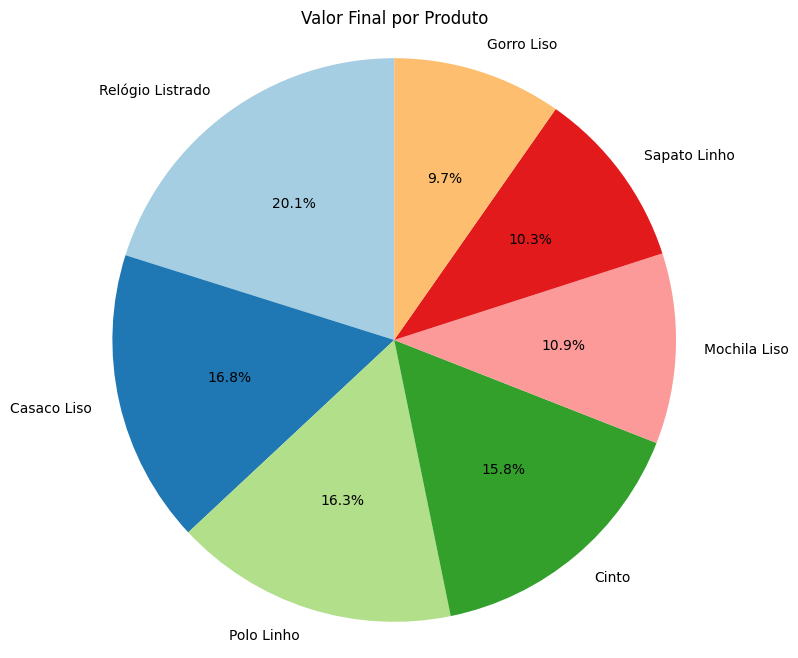

In [32]:
top_3 = df_amostra[df_amostra['ID Loja'] == 'Center Shopping Uberlândia']
valor_final_por_produto = top_3.groupby('Produto')['Valor Final'].sum().sort_values(ascending=False)
display(valor_final_por_produto.head(7))
valor_final_por_produto = valor_final_por_produto.head(7)
lista_produtos = valor_final_por_produto.index.tolist()
lista_valor_final = valor_final_por_produto.values.tolist()
plt.figure(figsize=(8,8))
plt.pie(lista_valor_final, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Valor Final por Produto')
plt.axis('equal')
plt.show()

novamente o padrão. agora com o item cueca. e com uma disrepancia enorme com relação a contribuição para o valor final do item terno estampa(item de alto valor)

Iguatemi Campinas

,Quantidade
Produto,
Terno Estampa,6
Tênis Xadrez,6
Bermuda Xadrez,5
Camisa,5
Terno Xadrez,5
Camisa Liso,4
Calça Listrado,4


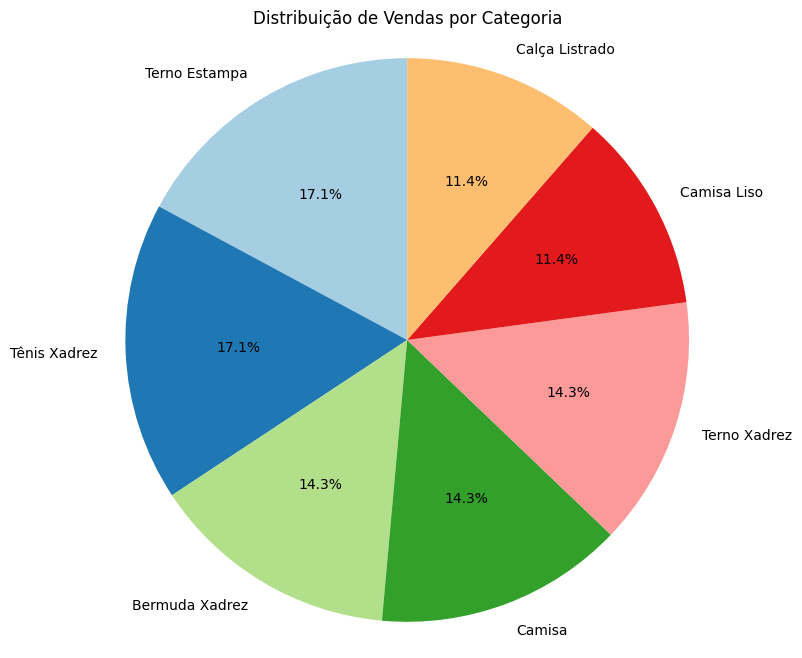

In [33]:
df_campinas = df_amostra[df_amostra['ID Loja'] == 'Iguatemi Campinas']
Iguatemi_Campinas = df_campinas.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
display(Iguatemi_Campinas.head(7))
top_7_produtos_campinas = Iguatemi_Campinas.head(7)
lista_produtos = top_7_produtos_campinas.index.tolist()
lista_quantidades = top_7_produtos_campinas.values.tolist()
plt.figure(figsize=(8, 8))
plt.pie(lista_quantidades, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Vendas por Categoria')
plt.axis('equal')
plt.show()

,Valor Final
Produto,
Terno Estampa,4236
Terno Xadrez,3545
Tênis Xadrez,1554
Bermuda Xadrez,775
Calça Listrado,724
Sapato,700
Camiseta,540


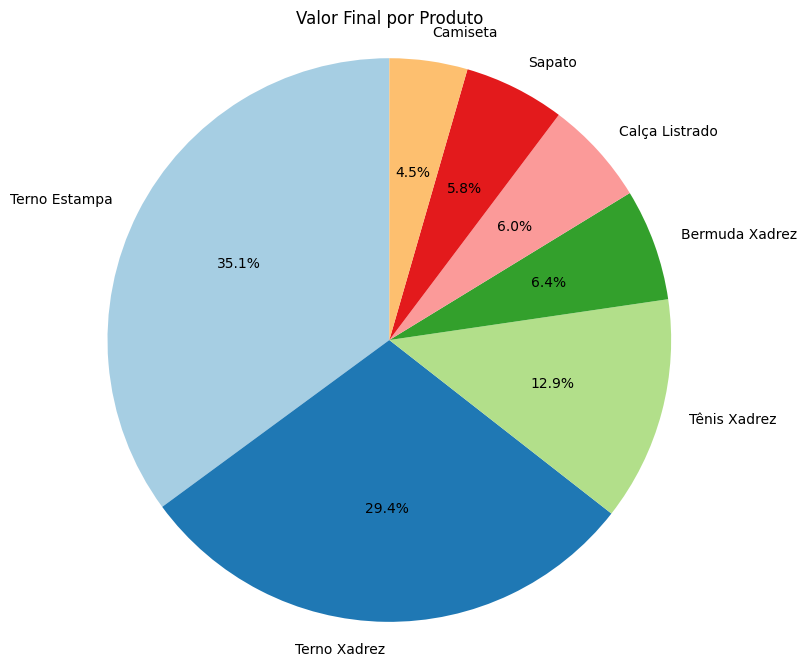

In [34]:
top_4 = df_amostra[df_amostra['ID Loja'] == 'Iguatemi Campinas']
valor_final_por_produto = top_4.groupby('Produto')['Valor Final'].sum().sort_values(ascending=False)
display(valor_final_por_produto.head(7))
valor_final_por_produto = valor_final_por_produto.head(7)
lista_produtos = valor_final_por_produto.index.tolist()
lista_valor_final = valor_final_por_produto.values.tolist()
plt.figure(figsize=(8,8))
plt.pie(lista_valor_final, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Valor Final por Produto')
plt.axis('equal')
plt.show()

Novamente o mesmo padrão de itens de baixo valor não estarem entre os produtos que contribuem significativamente para o valor final, mesmo estando entre os produtos mais vendidos da loja.

Bourbon Shopping SP Top 5

,Quantidade
Produto,
Gorro Listrado,7
Pulseira,6
Sapato Liso,6
Relógio,6
Casaco Liso,5
Gorro Xadrez,5
Casaco Listrado,4


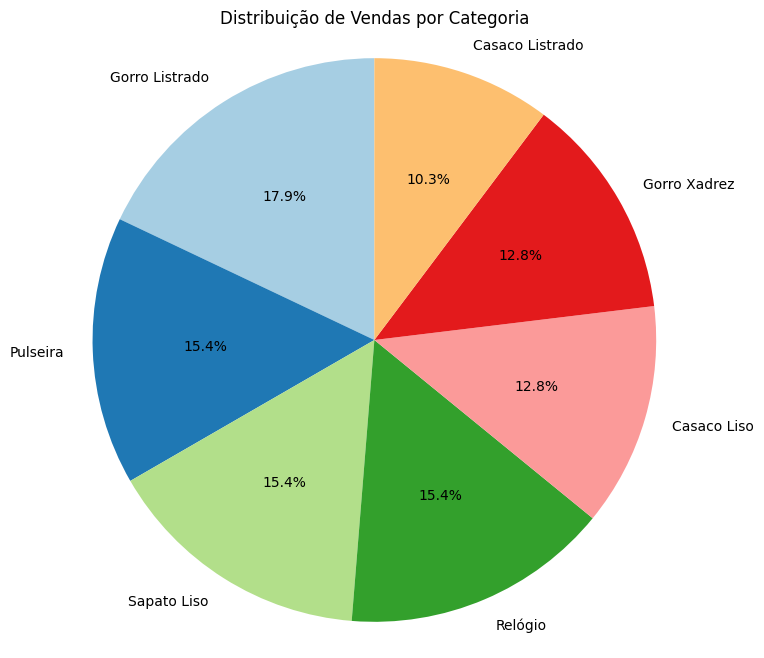

In [35]:
df_burbon = df_amostra[df_amostra['ID Loja'] == 'Bourbon Shopping SP']
Bourbon_Shopping_SP = df_burbon.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
display(Bourbon_Shopping_SP.head(7))
top_7_produtos_burbon = Bourbon_Shopping_SP.head(7)
lista_produtos = top_7_produtos_burbon.index.tolist()
lista_quantidades = top_7_produtos_burbon.values.tolist()
plt.figure(figsize=(8, 8))
plt.pie(lista_quantidades, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Vendas por Categoria')
plt.axis('equal')
plt.show()

,Valor Final
Produto,
Sapato Liso,2208
Sapato,1400
Casaco Liso,1275
Relógio,1200
Mochila Estampa,1108
Casaco Listrado,1076
Tênis Xadrez,1036


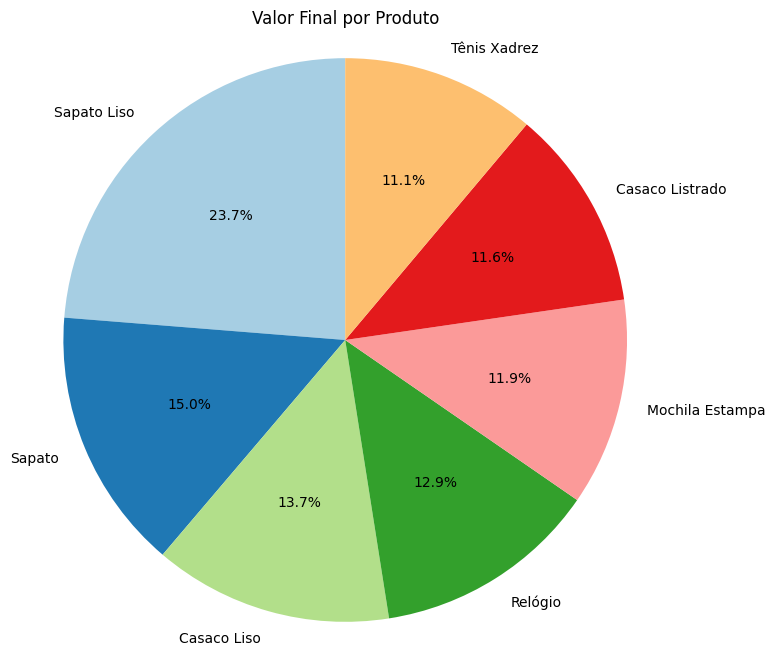

In [36]:
top_5 = df_amostra[df_amostra['ID Loja'] == 'Bourbon Shopping SP']
valor_final_por_produto = top_5.groupby('Produto')['Valor Final'].sum().sort_values(ascending=False)
display(valor_final_por_produto.head(7))
valor_final_por_produto = valor_final_por_produto.head(7)
lista_produtos = valor_final_por_produto.index.tolist()
lista_valor_final = valor_final_por_produto.values.tolist()
plt.figure(figsize=(8,8))
plt.pie(lista_valor_final, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Valor Final por Produto')
plt.axis('equal')
plt.show()

Nesta loja a ultima das 5 melhores em valor final, concretiza a idéia que de fato são os produtos de alto valor que fazem a diferença no valor final, aqui o produto terno, não esta entre os produtos mais vendidos da loja porem é a maior fatia dos produtos que contribuem para o valor final.

Informações extras dos Produtos.

Top 10 mais caros.

In [37]:
top_valor_produtos = df_amostra[['Produto','Valor Unitário']].groupby('Produto').max().sort_values(by='Valor Unitário',ascending=False).head(10)
display(top_valor_produtos)

,Valor Unitário
Produto,
Terno Linho,750
Terno Liso,720
Terno Listrado,709
Terno Xadrez,709
Terno Estampa,706
Terno,700
Sapato Linho,391
Sapato Liso,368
Sapato Xadrez,368


Os 10 produdos mais baratos

In [38]:
min_valor_produtos = df_amostra[['Produto','Valor Unitário']].groupby('Produto').min().sort_values(by='Valor Unitário',ascending=True).head(10)
display(min_valor_produtos)

,Valor Unitário
Produto,
Meia,30
Meia Listrado,37
Meia Liso,38
Meia Xadrez,41
Cueca,50
Meia Estampa,50
Cueca Xadrez,60
Chinelo,60
Chinelo Xadrez,66


10 produtos de valor mediano.

In [39]:
median_valor_produtos = df_amostra[['Produto','Valor Unitário']].groupby('Produto').median()
display(median_valor_produtos.head(10))

,Valor Unitário
Produto,
Bermuda,150.0
Bermuda Estampa,169.0
Bermuda Linho,195.0
Bermuda Liso,157.0
Bermuda Listrado,163.0
Bermuda Xadrez,155.0
Calça,170.0
Calça Estampa,177.0
Calça Linho,211.0


Análise da lojas com menor desempenho.



Shopping Midway Mall bottom 1

,Quantidade
Produto,
Cueca Listrado,6
Camiseta Liso,5
Camisa Estampa,4
Chinelo Estampa,3
Camisa,3
Cinto Linho,3
Polo,3


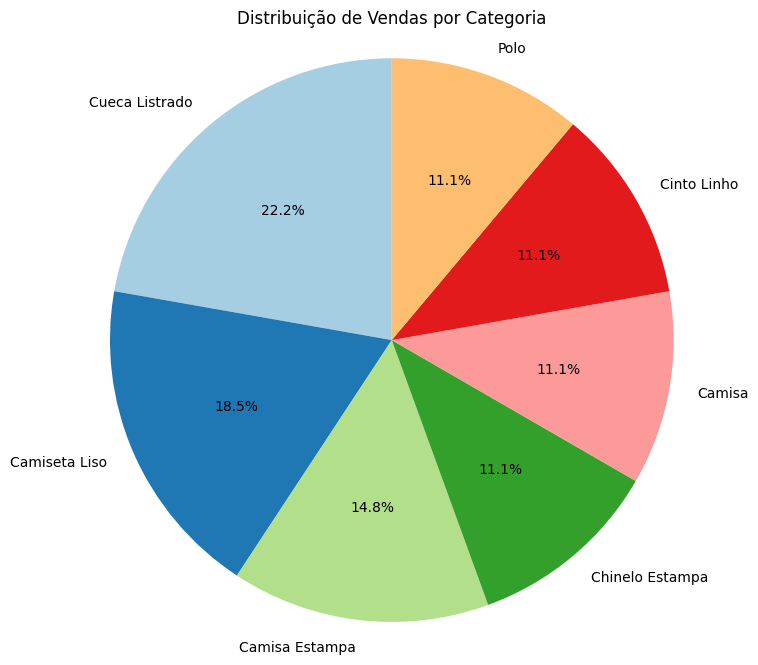

In [52]:
df_mall = df_amostra[df_amostra['ID Loja'] == 'Shopping Midway Mall']
Shopping_Midway_Mall = df_mall.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
display(Shopping_Midway_Mall.head(7))
top_7_produtos_barra = Shopping_Midway_Mall.head(7)
lista_produtos = top_7_produtos_barra.index.tolist()
lista_quantidades = top_7_produtos_barra.values.tolist()
plt.figure(figsize=(8, 8))
plt.pie(lista_quantidades, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Vendas por Categoria')
plt.axis('equal')
plt.show()


,Valor Final
Produto,
Sapato Linho,1173
Camiseta Liso,935
Cinto Linho,744
Relógio Liso,648
Camisa Estampa,452
Cinto Listrado,428
Cueca Listrado,402


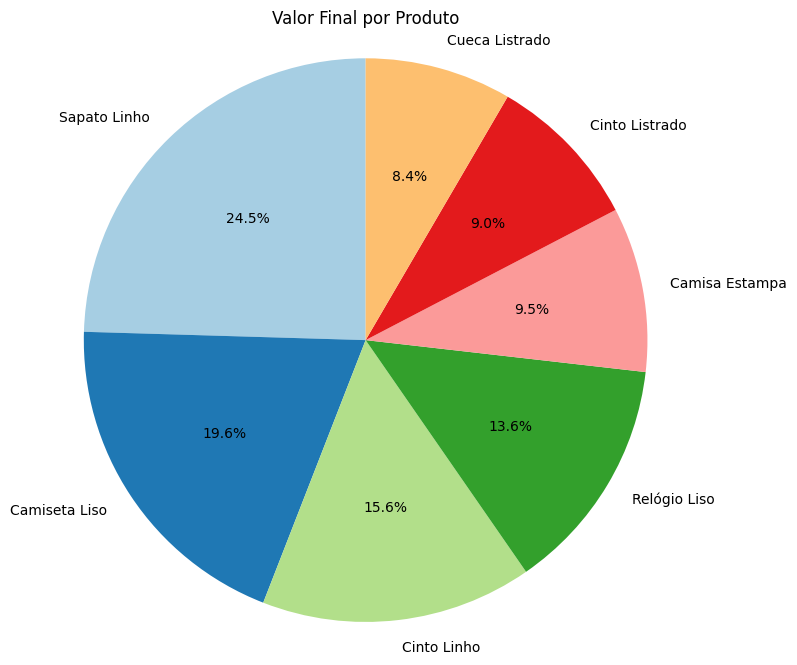

In [54]:
bottom_1 = df_amostra[df_amostra['ID Loja'] =='Shopping Midway Mall']
valor_final_por_produto = bottom_1.groupby('Produto')['Valor Final'].sum().sort_values(ascending=False)
display(valor_final_por_produto.head(7))
valor_final_por_produto = valor_final_por_produto.head(7)
lista_produtos = valor_final_por_produto.index.tolist()
lista_valor_final = valor_final_por_produto.values.tolist()
plt.figure(figsize=(8,8))
plt.pie(lista_valor_final, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Valor Final por Produto')
plt.axis('equal')
plt.show()

Passei das Águas Shopping bottom 2

,Quantidade
Produto,
Pulseira Estampa,7
Short Linho,5
Camisa Liso,5
Meia,4
Mochila Xadrez,4
Camisa Gola V Estampa,3
Cinto Xadrez,3


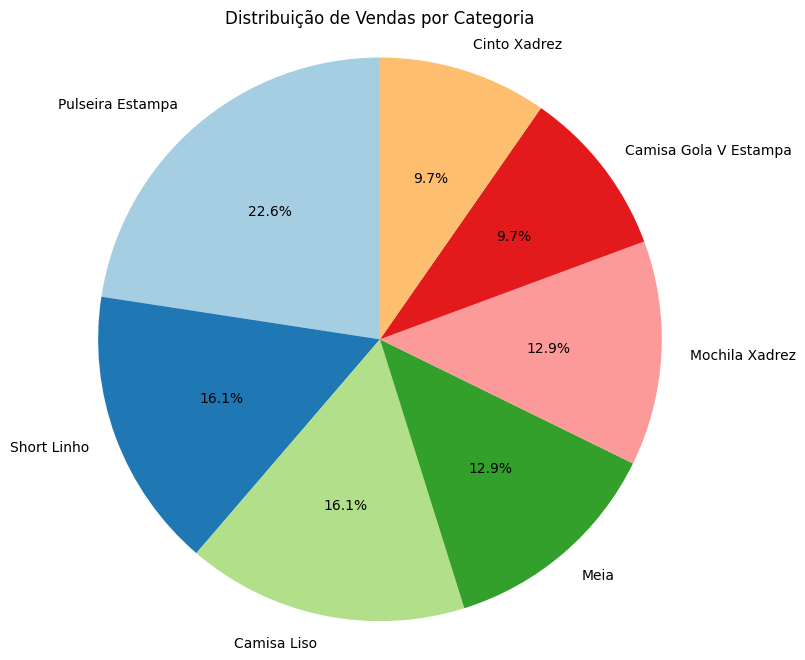

In [55]:
df_passei = df_amostra[df_amostra['ID Loja'] == 'Passei das Águas Shopping']
Passei_das_Aguas_Shopping = df_passei.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
display(Passei_das_Aguas_Shopping.head(7))
top_7_produtos_market = Passei_das_Aguas_Shopping.head(7)
lista_produtos = top_7_produtos_market.index.tolist()
lista_quantidades = top_7_produtos_market.values.tolist()
plt.figure(figsize=(8, 8))
plt.pie(lista_quantidades, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Vendas por Categoria')
plt.axis('equal')
plt.show()


,Valor Final
Produto,
Mochila Xadrez,1132
Mochila Linho,933
Sapato Listrado,726
Short Linho,665
Cinto Xadrez,645
Pulseira Estampa,609
Bermuda Linho,585


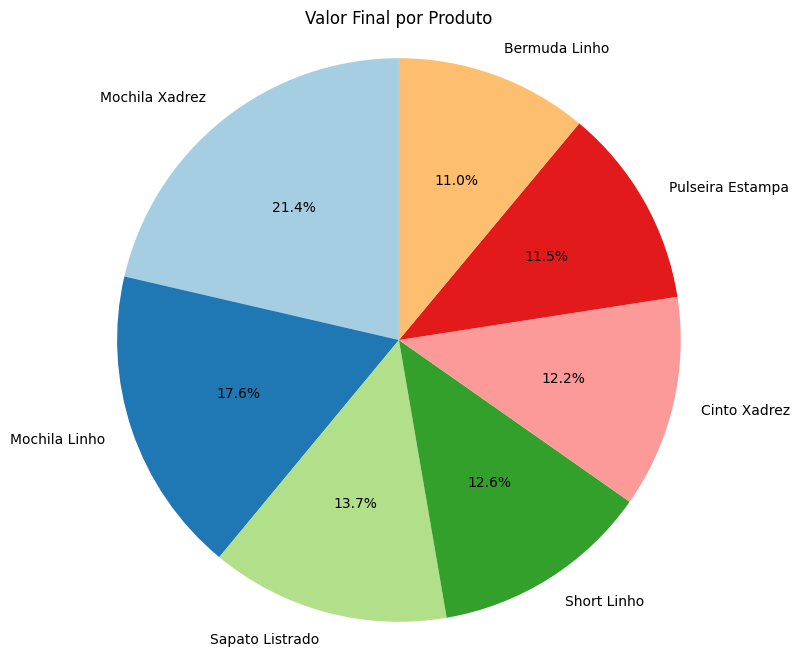

In [56]:
bottom_2 = df_amostra[df_amostra['ID Loja'] == 'Passei das Águas Shopping']
valor_final_por_produto = bottom_2.groupby('Produto')['Valor Final'].sum().sort_values(ascending=False)
display(valor_final_por_produto.head(7))
valor_final_por_produto = valor_final_por_produto.head(7)
lista_produtos = valor_final_por_produto.index.tolist()
lista_valor_final = valor_final_por_produto.values.tolist()
plt.figure(figsize=(8,8))
plt.pie(lista_valor_final, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Valor Final por Produto')
plt.axis('equal')
plt.show()

Shopping Recife bottom 3

,Quantidade
Produto,
Camisa Listrado,5
Meia Linho,5
Polo Estampa,5
Camisa Gola V Xadrez,4
Relógio Estampa,4
Sapato,3
Cinto Listrado,3


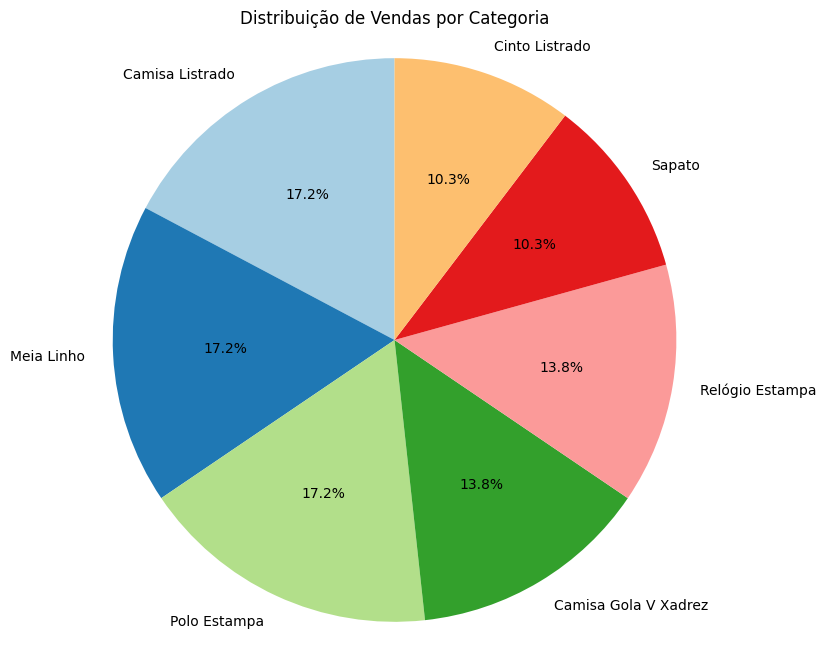

In [57]:
df_recife = df_amostra[df_amostra['ID Loja'] == 'Shopping Recife']
Shopping_Recife = df_recife.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
display(Shopping_Recife.head(7))
top_7_produtos_ribeirao = Shopping_Recife.head(7)
lista_produtos = top_7_produtos_ribeirao.index.tolist()
lista_quantidades = top_7_produtos_ribeirao.values.tolist()
plt.figure(figsize=(8, 8))
plt.pie(lista_quantidades, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Vendas por Categoria')
plt.axis('equal')
plt.show()


,Valor Final
Produto,
Sapato Liso,1104
Sapato,1050
Relógio Estampa,876
Polo Estampa,690
Cinto Listrado,642
Camisa Listrado,540
Camiseta Linho,446


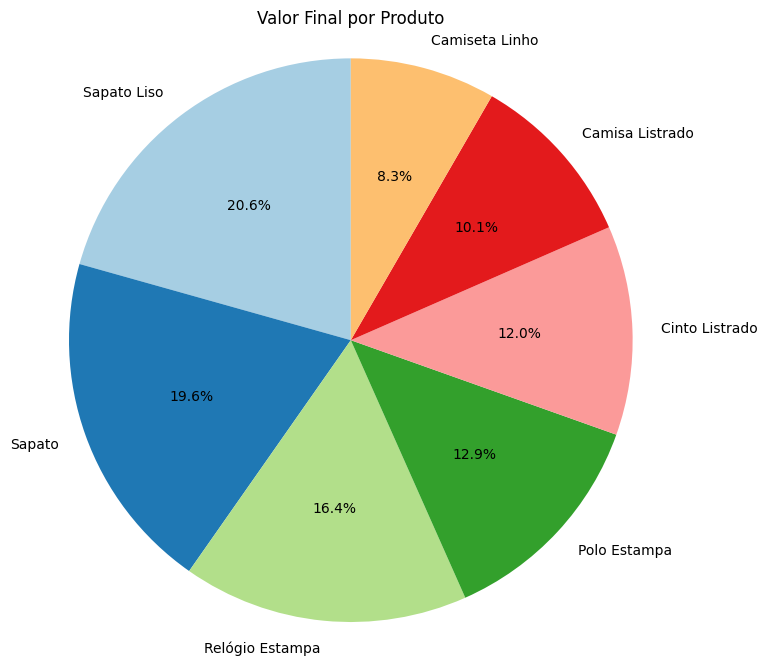

In [58]:
bottom_3 = df_amostra[df_amostra['ID Loja'] == 'Shopping Recife']
valor_final_por_produto = bottom_3.groupby('Produto')['Valor Final'].sum().sort_values(ascending=False)
display(valor_final_por_produto.head(7))
valor_final_por_produto = valor_final_por_produto.head(7)
lista_produtos = valor_final_por_produto.index.tolist()
lista_valor_final = valor_final_por_produto.values.tolist()
plt.figure(figsize=(8,8))
plt.pie(lista_valor_final, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Valor Final por Produto')
plt.axis('equal')
plt.show()

Shopping Vila Velha bottom 4

,Quantidade
Produto,
Camiseta,7
Camisa Linho,5
Cinto Estampa,5
Gorro Linho,4
Sunga,4
Camiseta Linho,4
Camisa Xadrez,3


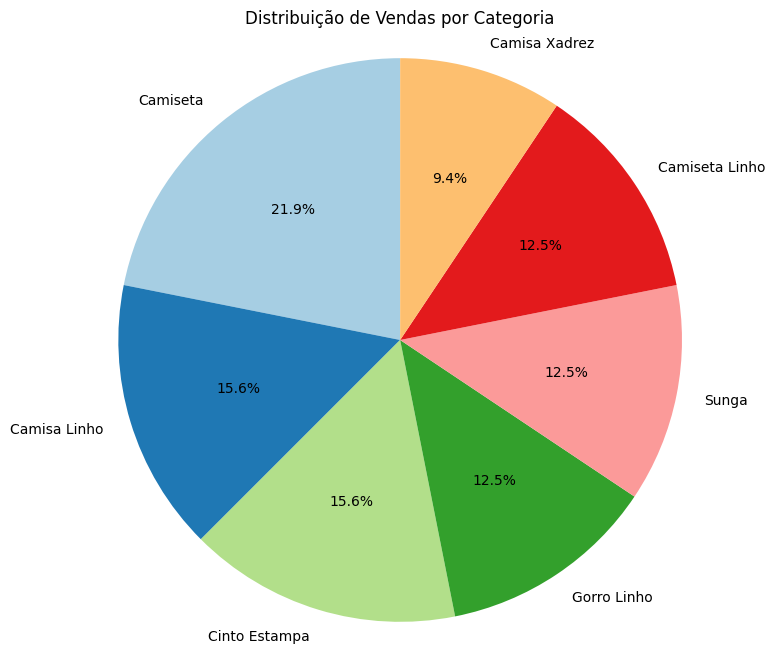

In [59]:
df_aricanduva = df_amostra[df_amostra['ID Loja'] == 'Shopping Center Leste Aricanduva']
Shopping_Center_Leste_Aricanduva = df_aricanduva.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
display(Shopping_Center_Leste_Aricanduva.head(7))
top_7_produtos_velha = Shopping_Center_Leste_Aricanduva.head(7)
lista_produtos = top_7_produtos_velha.index.tolist()
lista_quantidades = top_7_produtos_velha.values.tolist()
plt.figure(figsize=(8, 8))
plt.pie(lista_quantidades, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Vendas por Categoria')
plt.axis('equal')
plt.show()


,Valor Final
Produto,
Camiseta,1260
Cinto Estampa,1045
Camiseta Linho,892
Relógio Linho,720
Camisa Linho,705
Camiseta Listrado,591
Tênis,500


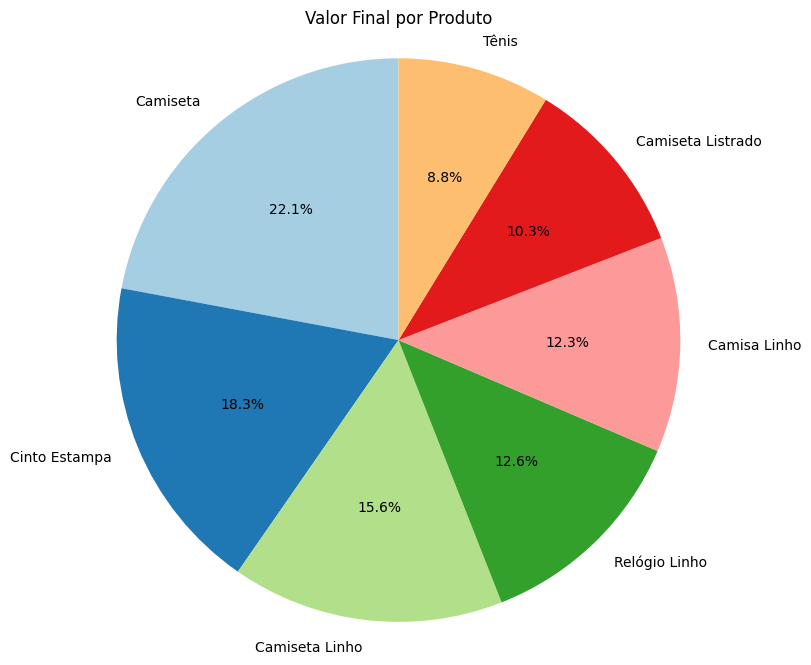

In [60]:
bottom_4 = df_amostra[df_amostra['ID Loja'] == 'Shopping Center Leste Aricanduva']
valor_final_por_produto = bottom_4.groupby('Produto')['Valor Final'].sum().sort_values(ascending=False)
display(valor_final_por_produto.head(7))
valor_final_por_produto = valor_final_por_produto.head(7)
lista_produtos = valor_final_por_produto.index.tolist()
lista_valor_final = valor_final_por_produto.values.tolist()
plt.figure(figsize=(8,8))
plt.pie(lista_valor_final, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Valor Final por Produto')
plt.axis('equal')
plt.show()


Shopping Iguatemi Fortaleza	 bottom 5

,Quantidade
Produto,
Short Liso,6
Pulseira Listrado,6
Camiseta Listrado,5
Short Estampa,5
Polo Linho,4
Camisa Estampa,3
Short,3


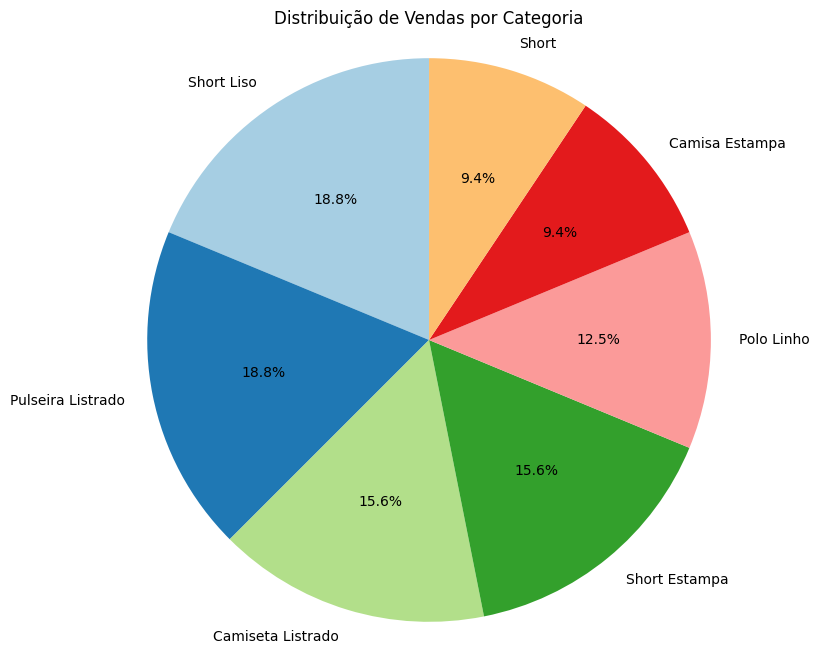

In [62]:
df_fortaleza = df_amostra[df_amostra['ID Loja'] == 'Shopping Iguatemi Fortaleza']
Shopping_Iguatemi_Fortaleza	 = df_fortaleza.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
display(Shopping_Iguatemi_Fortaleza .head(7))
top_7_produtos_mall = Shopping_Iguatemi_Fortaleza.head(7)
lista_produtos = top_7_produtos_mall.index.tolist()
lista_quantidades = top_7_produtos_mall.values.tolist()
plt.figure(figsize=(8, 8))
plt.pie(lista_quantidades, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição de Vendas por Categoria')
plt.axis('equal')
plt.show()


,Valor Final
Produto,
Camiseta Listrado,985
Casaco Xadrez,777
Polo Linho,704
Sapato,700
Short Liso,648
Cinto Estampa,627
Tênis Listrado,524


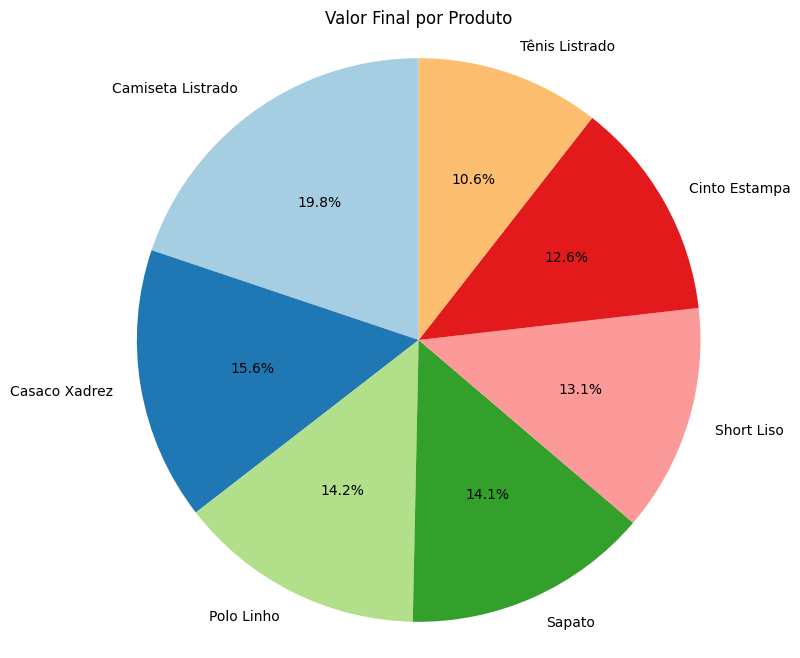

In [64]:
bottom_5 = df_amostra[df_amostra['ID Loja'] == 'Shopping Iguatemi Fortaleza']
valor_final_por_produto = bottom_5.groupby('Produto')['Valor Final'].sum().sort_values(ascending=False)
display(valor_final_por_produto.head(7))
valor_final_por_produto = valor_final_por_produto.head(7)
lista_produtos = valor_final_por_produto.index.tolist()
lista_valor_final = valor_final_por_produto.values.tolist()
plt.figure(figsize=(8,8))
plt.pie(lista_valor_final, labels=lista_produtos, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Valor Final por Produto')
plt.axis('equal')
plt.show()

Novo DataFrame com as loja de alto e baixo desempenho.

In [82]:
import pandas as pd


# Seus cálculos originais
# min_lojas_valor_final agora terá 'Valor Final' (total por loja, ordenado pelo menor)
min_lojas_valor_final = df_amostra[['ID Loja','Valor Final']].groupby('ID Loja').sum().sort_values(by='Valor Final',ascending=True).head(5)

# top_lojas_valor_final agora terá 'Valor Final' (total por loja, top 5 pelo maior valor)
# Perceba que renomeei a variável para ser mais descritiva
top_lojas_valor_final = df_amostra[['ID Loja','Valor Final']].groupby('ID Loja').sum().sort_values(by='Valor Final',ascending=False).head(5)

# --- A CORREÇÃO ESTÁ AQUI ---
# Ao fazer o merge, o pandas adicionará sufixos por padrão
# para colunas com o mesmo nome.

# Vamos realizar o merge. As colunas 'Valor Final' terão sufixos _x e _y
# por padrão, pois vêm de DataFrames diferentes com o mesmo nome de coluna.
comparacao_df = pd.merge(min_lojas_valor_final, top_lojas_valor_final,
                         left_index=True, right_index=True,
                         how='outer')

# Os nomes das colunas após o merge serão 'Valor Final_x' e 'Valor Final_y'
# onde _x se refere a min_lojas_valor_final e _y a top_lojas_valor_final
# É uma boa prática renomeá-las para serem mais claras:
comparacao_df = comparacao_df.rename(columns={'Valor Final_x': 'Valor Final (Min/Total)',
                                              'Valor Final_y': 'Valor Final (Top 5)'})

# Se você quiser preencher os NaNs com 0 para um resumo, pode fazer isso:
comparacao_df = comparacao_df.fillna(0)

print("DataFrame de comparação resultante:")

# Exemplo de ordenação pelo 'Valor Final (Top 5)'
print("\nDataFrame ordenado pelo 'Valor Final (Top 5)' (do maior para o menor):")
display(comparacao_df.sort_values(by='Valor Final (Top 5)', ascending=False))

DataFrame de comparação resultante:

DataFrame ordenado pelo 'Valor Final (Top 5)' (do maior para o menor):


,Valor Final (Min/Total),Valor Final (Top 5)
ID Loja,,
Bourbon Shopping SP,0.0,23509.0
Shopping Vila Velha,0.0,23303.0
Shopping Ibirapuera,0.0,19687.0
Palladium Shopping Curitiba,0.0,19149.0
Ribeirão Shopping,0.0,18846.0
Passei das Águas Shopping,10995.0,0.0
Shopping Center Leste Aricanduva,11417.0,0.0
Shopping Iguatemi Fortaleza,11512.0,0.0
Shopping Midway Mall,9890.0,0.0


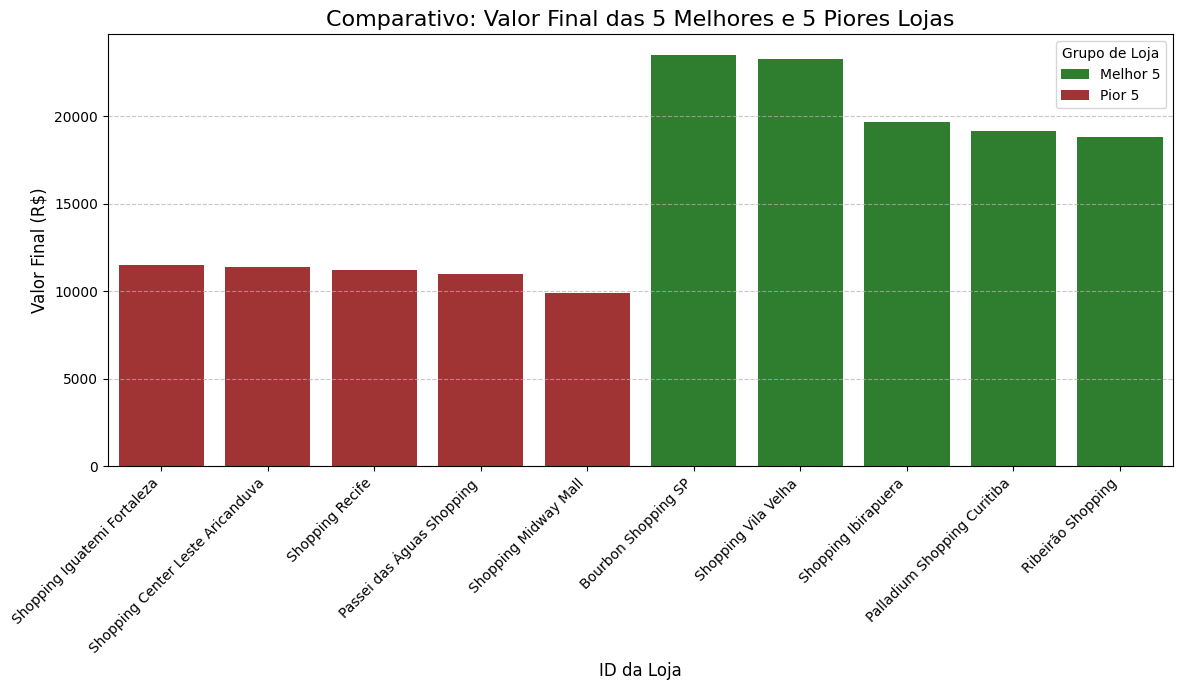

In [83]:
# Agrupando por ID Loja e somando o Valor Final (ordenado para facilitar a seleção)
lojas_valor_total = df_amostra[['ID Loja', 'Valor Final']].groupby('ID Loja').sum().sort_values(by='Valor Final', ascending=True)

# 1. Selecionando as 5 piores lojas (já estão no topo de lojas_valor_total, pois está em ordem crescente)
piores_5_lojas = lojas_valor_total.head(5).copy()
piores_5_lojas['Tipo'] = 'Pior 5' # Adiciona uma coluna para identificar o grupo

# 2. Selecionando as 5 melhores lojas (as 5 últimas em lojas_valor_total, ou as 5 primeiras se ordenar decrescente)
melhores_5_lojas = lojas_valor_total.tail(5).sort_values(by='Valor Final', ascending=False).copy()
melhores_5_lojas['Tipo'] = 'Melhor 5' # Adiciona uma coluna para identificar o grupo

# 3. Combinando os dois DataFrames
# pd.concat empilha os DataFrames. reset_index() transforma 'ID Loja' de volta em uma coluna
df_comparacao_top_piores = pd.concat([melhores_5_lojas, piores_5_lojas]).reset_index()

# 4. Criando o Gráfico
plt.figure(figsize=(12, 7)) # Aumenta um pouco o tamanho para acomodar mais barras

# Usamos o `hue='Tipo'` para colorir as barras de acordo com o grupo (Melhor 5 ou Pior 5)
sns.barplot(x='ID Loja', y='Valor Final', hue='Tipo', data=df_comparacao_top_piores,
            palette={'Melhor 5': 'forestgreen', 'Pior 5': 'firebrick'},
            order=df_comparacao_top_piores.sort_values(by=['Tipo', 'Valor Final'], ascending=[False, False])['ID Loja'])

plt.title('Comparativo: Valor Final das 5 Melhores e 5 Piores Lojas', fontsize=16)
plt.xlabel('ID da Loja', fontsize=12)
plt.ylabel('Valor Final (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Grupo de Loja') # Adiciona uma legenda para o tipo (Melhor 5 / Pior 5)
plt.tight_layout()
plt.show()

Conclusão da influencia dos Produtos no desempenho das lojas, podemos notar que mesmo entre as lojas de baixo desempenho, o faturamento por quantidade ainda não mostrou ser efetivo.(levando em conta que não há nos dados o custo do produto, assim "Valor Final" é aplicado como lucro bruto).
Sendo assim focar em vender produtos de alto valor é uma estratégia melhor para o Valor Final no caixa das lojas.
Tambem ficou notório que a loja Burbom demonstrou não sofrer tanta variação em seus lucros, e não sofreu queda no pior periodo dezembro.
Quais fatores alem de venda de produtos de alto valor, fazem a loja Burbom se destacar? Com os dados disponiveis não é possivel concluir é necessario dados de clientes, localidade, fluxo de estoque, e tipos de campanhas de marketing.